In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.23.2', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.42.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [19]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram


In [4]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [5]:
qc_output=QuantumCircuit(8)

In [6]:
qc_output.measure_all()

In [7]:
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

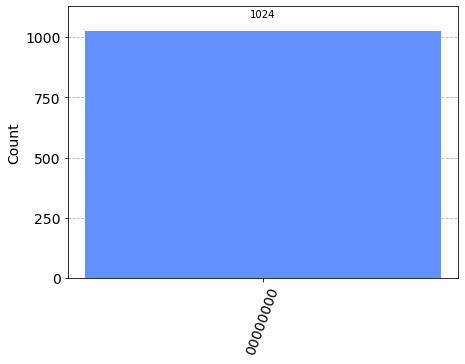

In [8]:
sim=Aer.get_backend('aer_simulator')
result=sim.run(qc_output).result()
counts=result.get_counts()
plot_histogram(counts)

In [9]:
qc_encode=QuantumCircuit(8)
qc_encode.x(7)

In [10]:
qc_encode.measure_all()

In [11]:
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

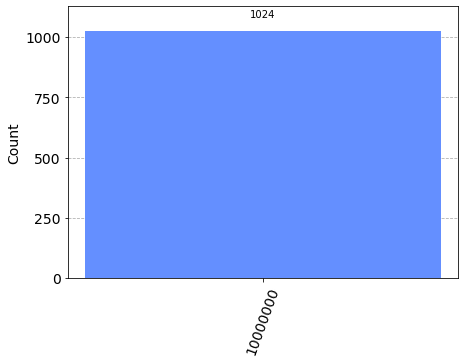

In [13]:
sim = Aer.get_backend('aer_simulator')
result=sim.run(qc_encode).result()
counts=result.get_counts()
plot_histogram(counts)

In [14]:
#Using CNOT gate
qc=QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [15]:
qc_ha=QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

#qc_ha.ccx(0,1,3)
#qc_ha.barrier()

qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     └───┘ ░   │        ░       
q_1: ──────░───┼────■───░───────
           ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [17]:
qc_ha=QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)

qc_ha.ccx(0,1,3)
qc_ha.barrier()

qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

In [18]:
#here it generated error, so qasm simulator with execute was used on the next cell for the purpose


#qobj=assemble(qc_ha)
#result=sim.run(qobj).result()
#counts=result.get_counts()
#plot_histogram(counts)

C:\Users\hp\AppData\Local\Temp/ipykernel_8460/3296888628.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result=sim.run(qobj).result()


TypeError: _run_qobj() got multiple values for argument 'parameter_binds'

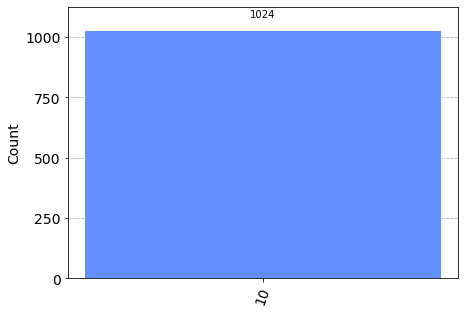

In [21]:
counts=execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)